Data PreProcessing

In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

def load_and_preprocess_data1(dataset_path, target_column, scaling=True):
    """ Load the dataset """
    dataset = pd.read_csv(dataset_path)
    
    """ Data Cleaning """
    # Replace blank spaces in 'TotalCharges' with NaN and then handle missing values
    dataset['TotalCharges'] = dataset['TotalCharges'].replace(' ', np.nan).astype(float)
    # Assign back the filled values to avoid FutureWarning
    dataset['TotalCharges'] = dataset['TotalCharges'].fillna(dataset['TotalCharges'].mean())
    
    # Drop the 'customerID' column as it is not needed for duplicate checks or modeling
    dataset.drop(columns=['customerID'], inplace=True)
    
    # Check and remove duplicates
    if dataset.duplicated().sum() > 0:
        dataset.drop_duplicates(inplace=True)

    # Drop rows with missing target values
    dataset.dropna(subset=[target_column], inplace=True)
    
    """ Separate features and target """
    X = dataset.drop(columns=[target_column])
    y = dataset[target_column]
    
    """ Convert target variable to numerical values if it's categorical """
    le = LabelEncoder()
    y = le.fit_transform(y)
    
    """ Convert categorical features to dummy variables (one-hot encoding) """
    X = pd.get_dummies(X, drop_first=True)
    
    """ Scale features """
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale features if required
    if scaling:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
    return X_train, X_test, y_train, y_test

def load_and_preprocess_data2(train_path, test_path, target_column, scaling=True):
    # Define column names for the dataset
    column_names = [
        'age', 'workclass', 'fnlwgt', 'education', 'education-num',
        'marital-status', 'occupation', 'relationship', 'race', 'sex',
        'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
    ]

    # Load the training and test datasets with specified column names
    train_dataset = pd.read_csv(train_path, header=None, names=column_names, na_values=' ?')
    test_dataset = pd.read_csv(test_path, header=None, names=column_names, na_values=' ?')
    
    # Remove possible footer line in the test set
    test_dataset = test_dataset[test_dataset[target_column].notna()]
    
    # Combine the training and test datasets
    combined_dataset = pd.concat([train_dataset, test_dataset], ignore_index=True)
    
    """ Data Cleaning """
    # Remove duplicates
    if combined_dataset.duplicated().sum() > 0:
        combined_dataset.drop_duplicates(inplace=True)
    
    # Drop rows with missing target values
    combined_dataset.dropna(subset=[target_column], inplace=True)
    
    # Map the target variable to binary values
    combined_dataset[target_column] = combined_dataset[target_column].str.strip()  # Remove spaces
    combined_dataset[target_column] = combined_dataset[target_column].map({'<=50K': 0, '>50K': 1})
    
    # Remove rows with NaN in the target column after mapping
    combined_dataset.dropna(subset=[target_column], inplace=True)
    
    # Handle missing values for other columns
    for col in combined_dataset.columns:
        if combined_dataset[col].isnull().sum() > 0:
            # If column is numerical, replace NaN with mean
            if combined_dataset[col].dtype in ['int64', 'float64']:
                combined_dataset[col] = combined_dataset[col].fillna(combined_dataset[col].mean())
            # If column is categorical, replace NaN with mode
            else:
                combined_dataset[col] = combined_dataset[col].fillna(combined_dataset[col].mode()[0])
    
    """ Separate features and target """
    X = combined_dataset.drop(columns=[target_column])
    y = combined_dataset[target_column]
    
    """ Convert categorical features to dummy variables (one-hot encoding) """
    X = pd.get_dummies(X, drop_first=True)
    
    """ Scale features """
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale features if required
    if scaling:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
    return X_train, X_test, y_train, y_test

def load_and_preprocess_data3(dataset_path, target_column, scaling=True):
    """ Load the dataset and preprocess it """
    dataset = pd.read_csv(dataset_path)
    
    """ Data Cleaning """
    # Fill missing values with column means
    if dataset.isna().sum().sum() > 0:
        dataset.fillna(dataset.mean(), inplace=True)
    
    # Remove duplicates
    if dataset.duplicated().sum() > 0:
        dataset.drop_duplicates(inplace=True)
    
    # Drop rows with missing target values
    dataset.dropna(subset=[target_column], inplace=True)

    """ Separate positive and negative samples """
    # Assuming '1' is the positive class and '0' is the negative class in target_column
    positive_samples = dataset[dataset[target_column] == 1]
    negative_samples = dataset[dataset[target_column] == 0]

    # Randomly select 20,000 negative samples
    negative_samples_subset = negative_samples.sample(n=20000, random_state=42)

    # Combine the positive samples with the negative samples subset
    dataset_subset = pd.concat([positive_samples, negative_samples_subset])

    # Shuffle the combined dataset
    dataset_subset = dataset_subset.sample(frac=1, random_state=42).reset_index(drop=True)

    """ Separate features and target """
    X = dataset_subset.drop(columns=[target_column])
    y = dataset_subset[target_column]

    """ Convert target variable to numerical values if it's categorical """
    le = LabelEncoder()
    y = le.fit_transform(y)

    """ Convert categorical features to dummy variables (one-hot encoding) """
    X = pd.get_dummies(X, drop_first=True)

    """ Scale features if required """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    if scaling:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
    return X_train, X_test, y_train, y_test

def get_train_test_set(dataset_choice):
    if dataset_choice == 1:
        dataset_path = 'input1.csv'
        target_column = 'Churn'
        return load_and_preprocess_data1(dataset_path, target_column)
    elif dataset_choice == 2:
        train_path = 'adult.data'
        test_path = 'adult.test'
        target_column = 'income'
        return load_and_preprocess_data2(train_path, test_path, target_column)
    elif dataset_choice == 3:
        dataset_path = 'input3.csv'
        target_column = 'Class'
        return load_and_preprocess_data3(dataset_path, target_column)
    else:
        raise ValueError("Invalid function number. Choose 1, 2, or 3.")


Logistic Regression

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_recall_curve, auc

# Custom Logistic Regression Class
class MyLogisticRegression:
    def __init__(self, learning_rate=0.5, num_iterations=50, tolerance=1e-6):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.tolerance = tolerance
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)

            old_weights = self.weights.copy()
            old_bias = self.bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Early stopping condition
            if np.linalg.norm(self.weights - old_weights) < self.tolerance and abs(self.bias - old_bias) < self.tolerance:
                break

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return np.where(y_predicted > 0.5, 1, 0)  # Ensure binary output

# Calculate and return various performance metrics 
def evaluate_lr_performance(y_true, y_pred):
    metrics = {}

    accuracy = accuracy_score(y_true, y_pred)
    metrics['Accuracy'] = accuracy

    # Check if the problem is binary
    if len(np.unique(y_true)) == 2:
        cm = confusion_matrix(y_true, y_pred)
        
        tn, fp, fn, tp = cm.ravel()
        
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        f1 = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) > 0 else 0
        auroc = roc_auc_score(y_true, y_pred)
        
        precision_curve, recall_curve, _ = precision_recall_curve(y_true, y_pred)
        aupr = auc(recall_curve, precision_curve)

        metrics['Sensitivity'] = sensitivity
        metrics['Specificity'] = specificity
        metrics['Precision'] = precision
        metrics['F1 Score'] = f1
        metrics['AUROC'] = auroc
        metrics['AUPR'] = aupr
    else:
        # For multiclass case, we don't compute binary metrics
        metrics['Confusion Matrix'] = confusion_matrix(y_true, y_pred)
    return metrics


Majority Voting (Bagging)

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, average_precision_score
from scipy.stats import mode

# Function to evaluate model performance
def evaluate_voting_model(y_test, predictions):
    """ Evaluate performance metrics """
    cm = confusion_matrix(y_test, predictions)
    accuracy = accuracy_score(y_test, predictions)
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])  # True Positive / (True Positive + False Negative)
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])  # True Negative / (True Negative + False Positive)
    precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])  # True Positive / (True Positive + False Positive)
    f1 = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) > 0 else 0
    auroc = roc_auc_score(y_test, predictions)
    aupr = average_precision_score(y_test, predictions)

    return {
        "Accuracy": accuracy,
        "Sensitivity": sensitivity,
        "Specificity": specificity,
        "Precision": precision,
        "F1 Score": f1,
        "AUROC": auroc,
        "AUPR": aupr,
    }

def train_and_vote(dataset_choice, n_models=9):
    """ Train models and perform majority voting """
    X_train, X_test, y_train, y_test = get_train_test_set(dataset_choice)
  
    train_data = pd.DataFrame(X_train)
    train_data['target'] = y_train

    predictions = np.zeros((X_test.shape[0], n_models))
    metrics_list = []  # List to store metrics from all models

    for i in range(n_models):
        bootstrapped_data = train_data.sample(frac=0.8, replace=True, random_state=i)
        X_train_bootstrap = bootstrapped_data.drop(columns=['target']).values
        y_train_bootstrap = bootstrapped_data['target'].values

        clf = MyLogisticRegression(learning_rate=0.5, num_iterations=50)
        clf.fit(X_train_bootstrap, y_train_bootstrap)
        predictions[:, i] = clf.predict(X_test)

        # Collect metrics for each learner (optional)
        model_metrics = evaluate_voting_model(y_test, predictions[:, i])
        metrics_list.append(model_metrics)
    
    # Perform majority voting (row-wise) to get final prediction
    final_predictions = mode(predictions, axis=1).mode.flatten()
    
    # Create DataFrame for violin plot
    metrics_df = pd.DataFrame(metrics_list)

    return final_predictions, metrics_df  # Return final predictions and DataFrame of metrics

# Function to plot violin plots for performance metrics
def plot_violin(metrics_df):
    """ Plot violin plots for each metric across models """
    plt.figure(figsize=(12, 8))
    sns.violinplot(data=metrics_df)
    plt.title('Performance Metrics for Bagging LR Learners')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Stacking with meta model

In [17]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_curve, auc, confusion_matrix

# Function to evaluate performance metrics
def evaluate_stacking_performance(y_true, y_pred):
    """ Calculate and return various performance metrics """
    
    metrics = {}

    # Calculate Accuracy
    metrics['Accuracy'] = accuracy_score(y_true, y_pred)

    # Confusion Matrix for Sensitivity and Specificity
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # Calculate Sensitivity (Recall)
    metrics['Sensitivity'] = tp / (tp + fn) if (tp + fn) > 0 else 0

    # Calculate Specificity
    metrics['Specificity'] = tn / (tn + fp) if (tn + fp) > 0 else 0

    # Calculate Precision
    metrics['Precision'] = tp / (tp + fp) if (tp + fp) > 0 else 0

    # Calculate F1 Score
    metrics['F1 Score'] = 2 * (metrics['Precision'] * metrics['Sensitivity']) / \
        (metrics['Precision'] + metrics['Sensitivity']) if \
        (metrics['Precision'] + metrics['Sensitivity']) > 0 else 0

    # Calculate AUROC
    metrics['AUROC'] = roc_auc_score(y_true, y_pred)

    # Calculate AUPR
    precision_curve, recall_curve, _ = precision_recall_curve(y_true, y_pred)
    metrics['AUPR'] = auc(recall_curve, precision_curve)

    return metrics

def train_and_stack_with_meta_classifier_ideal(dataset_choice, n_models=9):
    """ Load and preprocess data """
    X_train, X_test, y_train, y_test = get_train_test_set(dataset_choice)
    
    """ Split X_train further into base training set and meta training set """
    X_base_train, X_meta_train, y_base_train, y_meta_train = train_test_split(X_train, y_train, test_size=0.20, random_state=42)
    
    """ Combine X_base_train and y_base_train into a single DataFrame for resampling """
    base_train_data = pd.DataFrame(X_base_train)
    base_train_data['target'] = y_base_train

    """ Initialize arrays to store predictions """
    base_predictions_meta_train = np.zeros((X_meta_train.shape[0], n_models))  # To store predictions for meta-model training
    base_predictions_test = np.zeros((X_test.shape[0], n_models))              # To store predictions for test evaluation

    """ Train multiple Logistic Regression classifiers with bootstrapping """
    for i in range(n_models):
        # Resample 80% of the base training data (bootstrap sampling with replacement)
        bootstrapped_data = base_train_data.sample(frac=0.8, replace=True, random_state=i)  # 80% of the base training data
        X_train_bootstrap = bootstrapped_data.drop(columns=['target']).values
        y_train_bootstrap = bootstrapped_data['target'].values

        clf = MyLogisticRegression(learning_rate=0.5, num_iterations=50)
        clf.fit(X_train_bootstrap, y_train_bootstrap)
        
        # Collect predictions for the meta-model training
        base_predictions_meta_train[:, i] = clf.predict(X_meta_train)
        
        # Collect predictions for the test set
        base_predictions_test[:, i] = clf.predict(X_test)

    """ Combine original features of the meta training set with base model predictions """
    meta_features_train = np.hstack((X_meta_train, base_predictions_meta_train))
    
    """ Combine original features of the test set with base model predictions """
    meta_features_test = np.hstack((X_test, base_predictions_test))

    """ Train the meta-model using the combined features of the meta training set """
    meta_model = MyLogisticRegression(learning_rate=0.5, num_iterations=500)
    meta_model.fit(meta_features_train, y_meta_train)
    
    # Meta-model predictions on the combined features of the test set
    meta_predictions = meta_model.predict(meta_features_test)
    
    """ Evaluate the meta-model """

    return evaluate_stacking_performance(y_test, meta_predictions)


Table Making

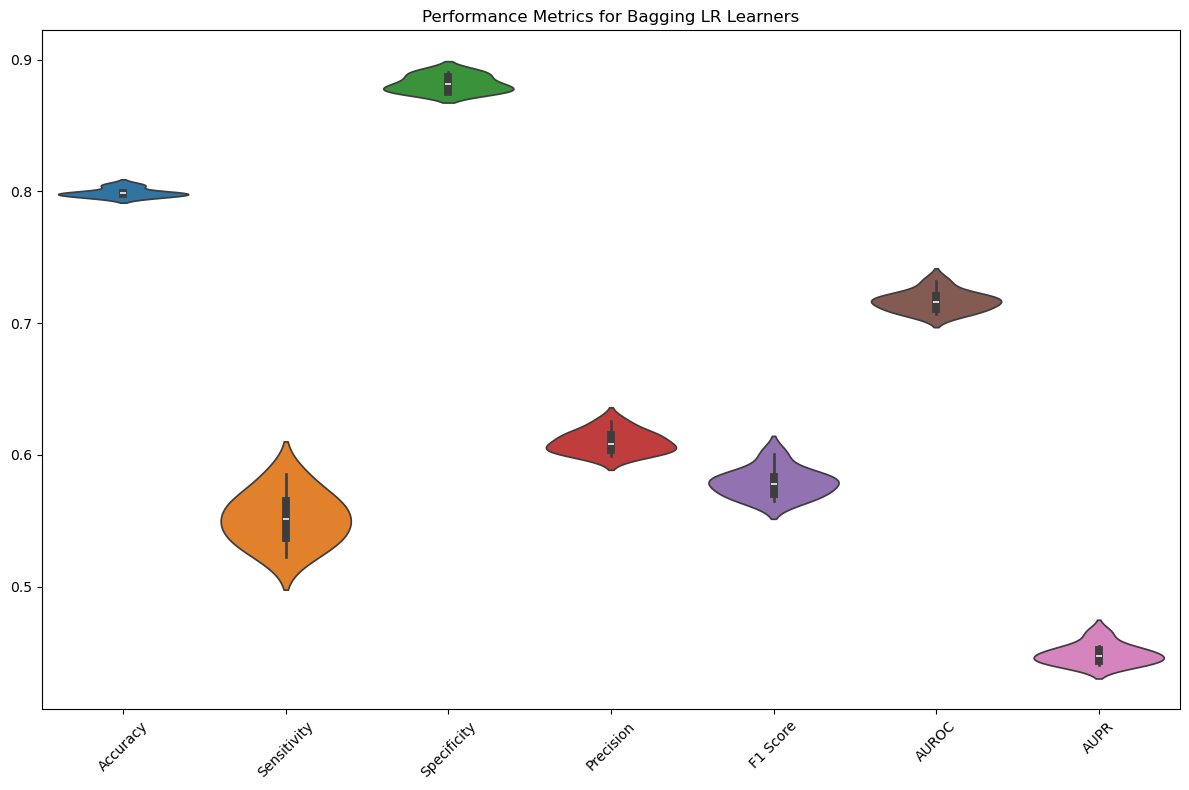


Performance on Test set:
Model               Accuracy       Sensitivity    Specificity    Precision      F1-score       AUROC          AUPR           
LR (Bagging)        0.7992 ± 0.0033	0.5518		0.8819		0.6098		0.5791		0.7168		0.4488
Voting Ensemble     0.8036         0.5540         0.8870         0.6210         0.5856         0.7205         0.4558         
Stacking Ensemble   0.7957         0.5767         0.8689         0.5953         0.5859         0.7228         0.6390         


In [23]:
def generate_comparative_table(results, metrics_df=None):
    print("\nPerformance on Test set:")
    # Print table headers with tabs for alignment
    print(f"{'Model':<20}{'Accuracy':<15}{'Sensitivity':<15}{'Specificity':<15}{'Precision':<15}{'F1-score':<15}{'AUROC':<15}{'AUPR':<15}")

    # For LR, calculate average and std deviation from the violin plot data (metrics_df)
    if metrics_df is not None:
        lr_accuracy_avg = metrics_df['Accuracy'].mean()
        lr_accuracy_std = metrics_df['Accuracy'].std()
        lr_sensitivity_avg = metrics_df['Sensitivity'].mean()
        lr_specificity_avg = metrics_df['Specificity'].mean()
        lr_precision_avg = metrics_df['Precision'].mean()
        lr_f1_avg = metrics_df['F1 Score'].mean()
        lr_auroc_avg = metrics_df['AUROC'].mean()
        lr_aupr_avg = metrics_df['AUPR'].mean()

        # Print LR (Bagging) with average and std deviation
        print(f"{'LR (Bagging)':<20}{lr_accuracy_avg:.4f} ± {lr_accuracy_std:.4f}\t{lr_sensitivity_avg:.4f}\t\t{lr_specificity_avg:.4f}\t\t{lr_precision_avg:.4f}\t\t{lr_f1_avg:.4f}\t\t{lr_auroc_avg:.4f}\t\t{lr_aupr_avg:.4f}")

    # Print Voting and Stacking ensemble results
    for model_name, metrics in results.items():
        if model_name == 'LR (Bagging)':
            continue  # We've already printed LR (Bagging) with averages
        # Print other models
        print(f"{model_name:<20}{metrics['Accuracy']:<15.4f}{metrics['Sensitivity']:<15.4f}{metrics['Specificity']:<15.4f}{metrics['Precision']:<15.4f}{metrics['F1 Score']:<15.4f}{metrics['AUROC']:<15.4f}{metrics['AUPR']:<15.4f}")

# Main Function to Run Experiments Based on Dataset Choice
def run_experiments(dataset_choice):
    X_train, X_test, y_train, y_test = get_train_test_set(dataset_choice)
    
    # Logistic Regression (Bagging)
    model = MyLogisticRegression(learning_rate=0.5, num_iterations=50)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    lr_results = evaluate_lr_performance(y_test, y_pred)
    
    # Majority Voting
    n_models = 9
    final_predictions, metrics_df = train_and_vote(dataset_choice, n_models=n_models)
    voting_results = evaluate_voting_model(y_test, final_predictions)
    plot_violin(metrics_df)

    # Stacking
    stacking_results = train_and_stack_with_meta_classifier_ideal(dataset_choice, n_models=n_models)
    
    # Store results and generate comparative table
    results = {
        'LR (Bagging)': lr_results,
        'Voting Ensemble': voting_results,
        'Stacking Ensemble': stacking_results
    }
    
    # Print comparative table
    #generate_comparative_table(results)
    generate_comparative_table(results, metrics_df=metrics_df)

# Set dataset_choice and run experiments
dataset_choice = 1  # Change to 2 for Adult dataset, 3 for input3
run_experiments(dataset_choice)